In [ ]:
def stratified_split(df, val_percent=0.2):
    import numpy as np
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=[0,1,2]
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df.loc[df['Label_y']==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs

In [ ]:
import pandas as pd
df = pd.read_csv("Documents/GitHub/Frame-level-student-engagement/Data/WACV_train_data.csv")

train_idxs, test_idxs = stratified_split(df, val_percent=0.25)

train_df = df[df.index.isin(train_idxs)]
train_df_x = train_df.loc[:,'gaze_0_x':"AU45_c"]
x_train = train_df_x.values
y_train = train_df[['Label_y']].values

test_df = df[df.index.isin(test_idxs)]
test_df_x = test_df.loc[:,'gaze_0_x':"AU45_c"]
x_test = test_df_x.values
y_test = test_df[['Label_y']].values

In [ ]:
dfD = pd.read_csv("Documents/GitHub/Frame-level-student-engagement/Data/DAiSEE_TL_data.csv")

In [ ]:
dfD

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c,Label
0,0.464789,0.462963,0.473973,0.466276,0.470752,0.463855,0.483516,0.476331,0.475543,0.466472,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.628169,0.765432,0.638356,0.730205,0.635097,0.740964,0.645604,0.713018,0.641304,0.720117,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2,0.442254,0.487654,0.446575,0.466276,0.440111,0.466867,0.436813,0.446746,0.445652,0.460641,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
3,0.625352,0.438272,0.616438,0.454545,0.623955,0.448795,0.631868,0.473373,0.616848,0.454810,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2
4,0.754930,0.265432,0.734247,0.272727,0.749304,0.265060,0.744505,0.284024,0.730978,0.274052,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144318,0.507042,0.762346,0.512329,0.744868,0.512535,0.753012,0.519231,0.742604,0.513587,0.737609,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1
144319,0.400000,0.558642,0.416438,0.551320,0.403900,0.545181,0.414835,0.526627,0.421196,0.545190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
144320,0.422535,0.567901,0.443836,0.557185,0.437326,0.560241,0.464286,0.562130,0.448370,0.556851,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
144321,0.436620,0.672840,0.452055,0.668622,0.448468,0.671687,0.469780,0.677515,0.456522,0.667638,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3


In [ ]:
train_idxs, test_idxs = stratified_split(dfD, val_percent=0.25)

train_dfD = dfD[dfD.index.isin(train_idxs)]
train_dfD_x = train_dfD.loc[:,'gaze_0_x':"AU45_c"]
xD_train = train_dfD_x.values
yD_train = train_dfD[['Label']].values

test_dfD = dfD[dfD.index.isin(test_idxs)]
test_dfD_x = test_dfD.loc[:,'gaze_0_x':"AU45_c"]
xD_test = test_dfD_x.values
yD_test = test_dfD[['Label']].values

In [ ]:
temp = []

In [ ]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#initial model
xgb = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=9,
                    min_child_weight=1,
                    # gamma=0,
                    # subsample=0.8,
                    # colsample_bytree=0.8,
                    objective='multi:softmax',
                    # nthread=4,
                    num_class=9,
                    seed=27)
xgb.fit(x_train, y_train.reshape(y_train.shape[0],))
predicted_labels = xgb.predict(x_test)
train_pred = xgb.predict(x_train)
temp.append([accuracy_score(y_test, predicted_labels),
              precision_score(y_test, predicted_labels, average='weighted'), 
              recall_score(y_test, predicted_labels, average='weighted'),
              f1_score(y_test, predicted_labels,average='micro')])     

In [ ]:
predicted_labelsD = xgb.predict(xD_test)
train_predD = xgb.predict(xD_train)
temp.append([accuracy_score(yD_test, predicted_labelsD),
              precision_score(yD_test, predicted_labelsD, average='weighted'), 
              recall_score(yD_test, predicted_labelsD, average='weighted'),
              f1_score(yD_test, predicted_labelsD,average='micro')])   

In [ ]:
temp

[[0.6285414480587618,
  0.6313760507275035,
  0.6285414480587618,
  0.6285414480587618],
 [0.5122722810079633,
  0.46330015501804417,
  0.5122722810079633,
  0.5122722810079633]]

Confusion Matrix:
[[  340  1805   373]
 [  836 12090  3043]
 [  313  7043  1658]]


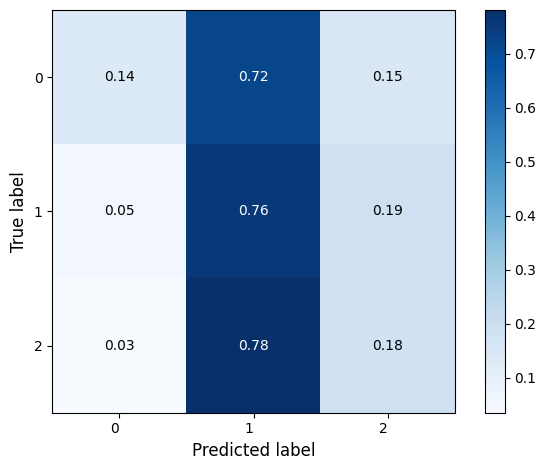

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
          #  title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
    # Set label sizes
    ax.xaxis.label.set_size(12)
    ax.yaxis.label.set_size(12)
    # Format the values as percentages
    if normalize:
        fmt = '.2f'
    else:
        fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Compute the confusion matrix
cm = confusion_matrix(yD_test, predicted_labelsD)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

labels = [0, 1, 2]
plot_confusion_matrix(yD_test, predicted_labelsD, classes=labels, normalize=True)
plt.savefig("Documents/GitHub/Frame-level-student-engagement/Results/ConfusionMat_XGB.pdf")
plt.show()

In [ ]:
predicted_labelsD

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

C:\Users\rijju\AppData\Local\Temp\ipykernel_3060\3758450794.py:32: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  counts['Percentage'] = counts.groupby('Intervals')['Count'].apply(lambda x: x*100/sum(x))


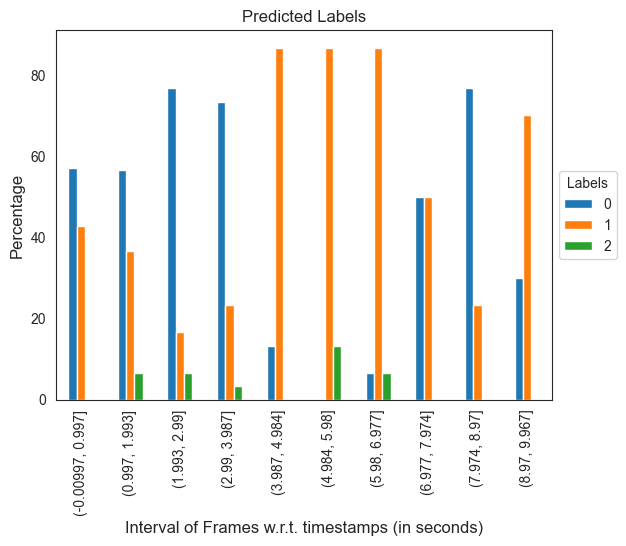

In [62]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path= "Documents/GitHub/Frame-level-student-engagement/Data/1100012069.csv"
# model_path = "/content/drive/MyDrive/DAiSEE/trained_models/model_xgb_2.joblib"

# Read graph data from CSV file
data = pd.read_csv(data_path)
timestamps = data['timestamp']
data_au = data.loc[:,'gaze_0_x':"AU45_c"]
df = pd.concat([timestamps, data_au], axis=1)

# Load the trained model
# xgb = joblib.load(model_path)
predicted_labelsD = xgb.predict(data_au)

data = pd.DataFrame({
    'Values': timestamps,
    'Labels': predicted_labelsD
})

# Use pd.cut() to divide the data into n bins of equal width
bins = 10
data['Intervals'] = pd.cut(data['Values'], bins)

# Group the data by intervals and labels, and count the number of occurrences
counts = data.groupby(['Intervals', 'Labels']).size().reset_index(name='Count')

# Calculate percentage of count instead of count
counts['Percentage'] = counts.groupby('Intervals')['Count'].apply(lambda x: x*100/sum(x))


# Pivot the counts dataframe to have each label in a separate column
counts_pivot = counts.pivot(index='Intervals', columns='Labels', values='Percentage')

# Plot the percentages as a bar chart
counts_pivot.plot(kind='bar')
plt.xlabel('xlabel', fontsize=12)
plt.ylabel('ylabel', fontsize=12)
plt.xlabel('Interval of Frames w.r.t. timestamps (in seconds)')
# plt.xlabel('Interval of Frames')
plt.ylabel('Percentage')
plt.title('Predicted Labels')
plt.legend(title='Labels', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig("Documents/GitHub/Frame-level-student-engagement/Results/1100012069predictedlabels3.pdf")
plt.show()

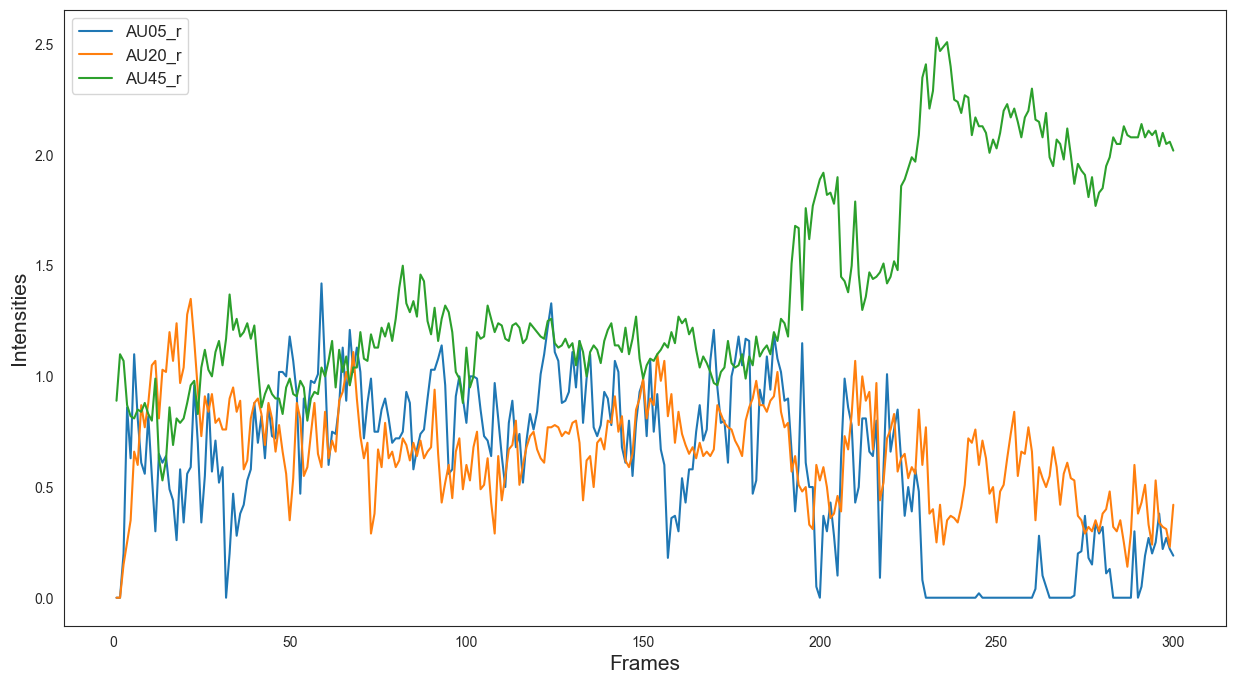

In [72]:
import pandas as pd, seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt 


data_path= "Documents/GitHub/Frame-level-student-engagement/Data/3100822031.csv"
# model_path = "/content/drive/MyDrive/DAiSEE/trained_models/model_xgb_2.joblib"

# Read graph data from CSV file
data = pd.read_csv(data_path)
timestamps = data.loc[:,'frame':'timestamp']
frames = data["frame"]
data_au = data.loc[:,"AU01_r":"AU45_r"]
df = pd.concat([timestamps, data_au], axis=1)

au_cols = data_au.columns

plt.figure(figsize=(15, 8))
for au_ix, au_col in enumerate(au_cols):
  if au_col == "AU05_r" or au_col =="AU20_r" or au_col=="AU45_r":
    plt.plot(df['frame'], df[au_col], label=au_col)
plt.legend(loc="upper left", fontsize=12)
plt.xlabel('Frames', fontsize=15)
plt.ylabel('Intensities', fontsize=15)
plt.savefig("Documents/GitHub/Frame-level-student-engagement/Results/3_AU3100822031_plot.pdf")

In [ ]:
!pwd

/c/Users/rijju
